# Import Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load the data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows of the dataframe

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Display the shape of the dataframe

In [4]:
crop.shape

(2200, 8)

# Display information about the dataframe

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Display the count of missing values in each column

In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Display the count of duplicate rows

In [7]:
crop.duplicated().sum()

0

# Display summary statistics of the dataframe

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Data preprocessing

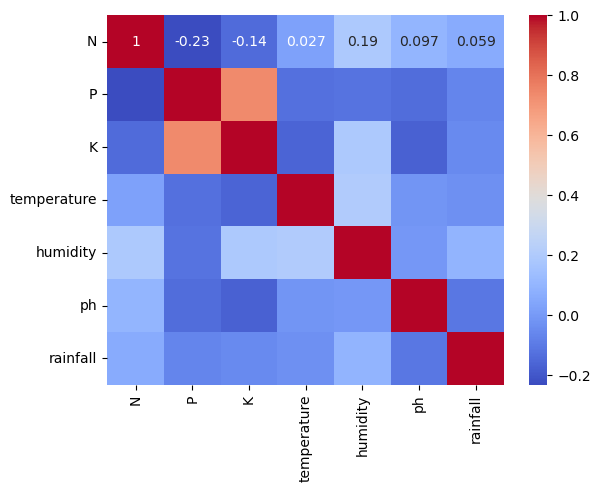

In [9]:
numeric_crop = crop.drop('label', axis=1)
corr = numeric_crop.corr()
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
plt.show()

# Display the value counts of the 'label' column

In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Histogram plot of the 'N' column

c:\Users\sohil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


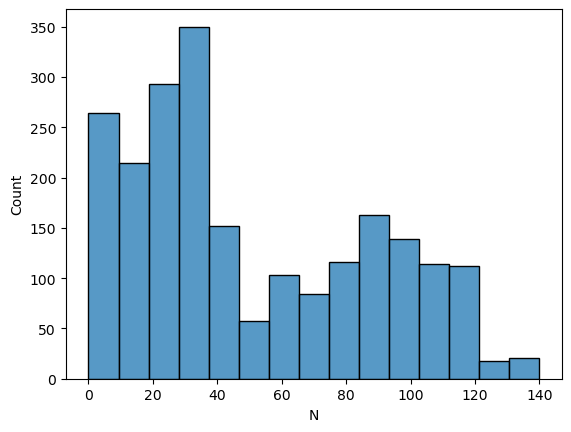

In [11]:
sns.histplot(crop['N'])
plt.show()

# Create a dictionary for mapping crop labels to numeric values

In [12]:
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7, 'apple': 8,
    'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 
    'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20, 
    'chickpea': 21, 'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

# Display the value counts of the 'crop_num' column

In [13]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

# Display the first few rows of the dataframe with the new 'crop_num' column

In [14]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Split the data into features and target variable

In [15]:
X = crop.drop(['crop_num', 'label'], axis=1)
y = crop['crop_num']

# Display the shape of the features and target variable

In [16]:
X.shape, y.shape

((2200, 7), (2200,))

# Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets

In [18]:
X_train.shape, X_test.shape

((1760, 7), (440, 7))

# Data scaling

In [19]:
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create instances of all models

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Dictionary to store accuracy of each model

In [21]:
accuracy_dict = {}

# Train and evaluate each model

In [22]:
for name, md in models.items():
    md.fit(X_train, y_train)
    ypred = md.predict(X_test)
    accuracy = accuracy_score(y_test, ypred)
    accuracy_dict[name] = accuracy
    print(f"{name} with accuracy: {accuracy}")

Logistic Regression with accuracy: 0.9636363636363636
Naive Bayes with accuracy: 0.9954545454545455
Support Vector Machine with accuracy: 0.9681818181818181
K-Nearest Neighbors with accuracy: 0.9590909090909091
Decision Tree with accuracy: 0.9818181818181818
Random Forest with accuracy: 0.9931818181818182
Bagging with accuracy: 0.9863636363636363
AdaBoost with accuracy: 0.1409090909090909
Gradient Boosting with accuracy: 0.9818181818181818
Extra Trees with accuracy: 0.9113636363636364


# Visualize the accuracy of each algorithm

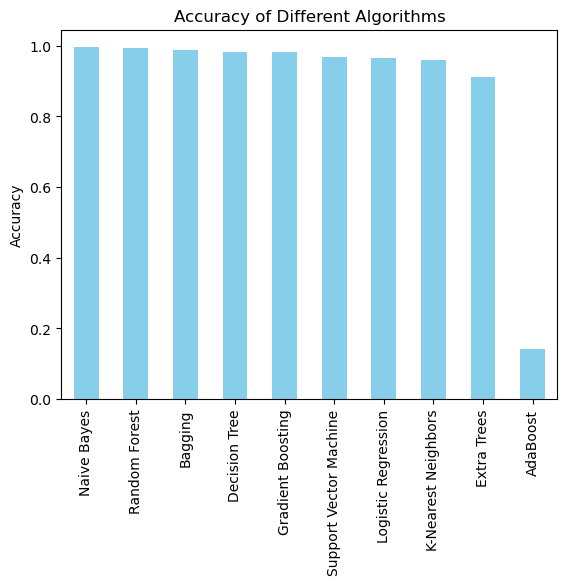

In [23]:
accuracy_series = pd.Series(accuracy_dict)
accuracy_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Accuracy of Different Algorithms')
plt.ylabel('Accuracy')
plt.show()

# Best model: RandomForestClassifier

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, ypred)}")

Random Forest Accuracy: 0.9931818181818182


# Plotting a single tree from the RandomForestClassifier

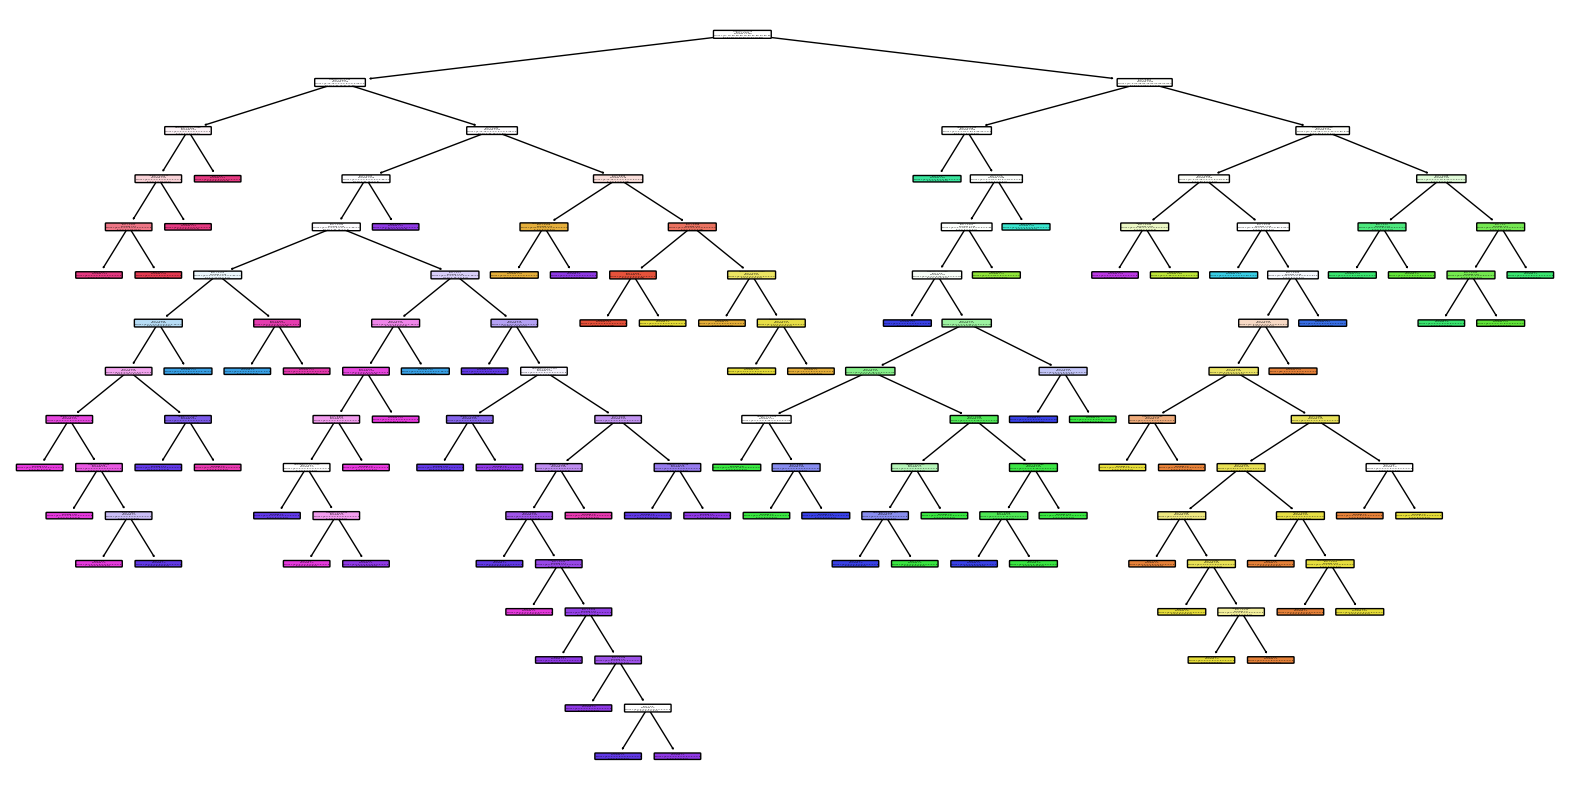

In [25]:
plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Recommendation function

In [26]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)
    prediction = rfc.predict(transformed_features)
    return prediction[0]

# Test the recommendation function

In [27]:
N = 40
P = 50
K = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

c:\Users\sohil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Crop dictionary for prediction

In [28]:
crop_dict_rev = {v: k for k, v in crop_dict.items()}

if predict in crop_dict_rev:
    crop_name = crop_dict_rev[predict]
    print(f"{crop_name} is the best crop to be cultivated.")
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

chickpea is the best crop to be cultivated.


# Save the models and scalers

In [29]:
pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))